# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>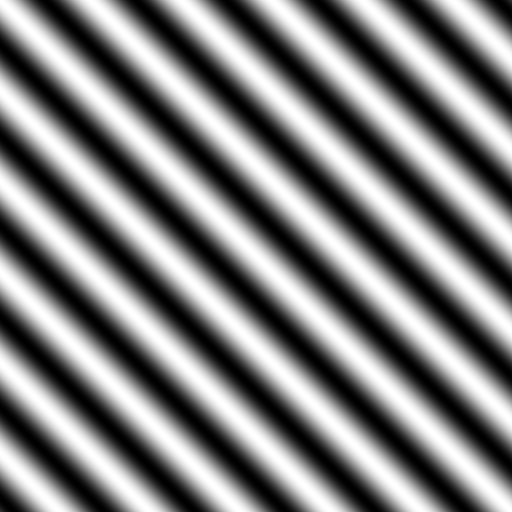</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift, fftfreq, ifft2
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib inline 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Te=1`.


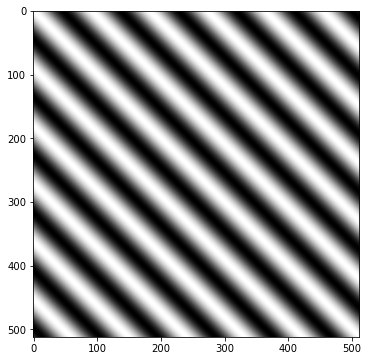

In [2]:
s45 = sinusoid2d(1,45,512,64,1)
imshow(s45)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

soit  $h(t,u)$la valeur correspondant au pixel de coordonnées t,u
$$
 FT(h)(f,g) =\frac A{2} \delta_\frac {e_t}{T_0}(f)\delta_\frac {s_t}{T_0}(g)+ \frac A{2} \delta_\frac {-e_t}{T_0}(f)\delta_\frac {-s_t}{T_0}(g)
 $$
Donc $f_{t}^{max}=max(|c_t/T_0|,|-c_t/T_0|)=|c_t/T_0| $

Et donc on à symetriquement pour $f_{u}^{max}=\frac {s_t}{T_0}$

On peux conclure que $fm=max(s_t,c_t)f_0$ et que pour ces valeurs,$ sin(\theta )$ et $cos(\theta)$ sont egaux on obtient donc $f_m=\frac{\sqrt{2}}{2}f_0$

In [3]:
f_m = (1/64) * (np.sqrt(2))/2 
print(f_m)

0.011048543456039806


2. (b)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

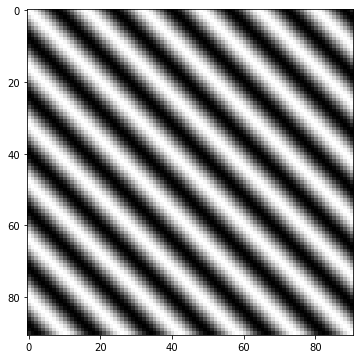

In [4]:
# sampled_s45 = shannonInterpolation(s45, 16*f_m, 512)
# imshow(sampled_s45)
sampled_s45 = sinusoid2d(1,45,512,64,(1/(16*f_m)))
imshow(sampled_s45)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use surf() function for an interactive 3D plot.

In [5]:
def thresholdImage(I,s):
    return np.where((I<s),0,255)
    """ Array*int -> Array """

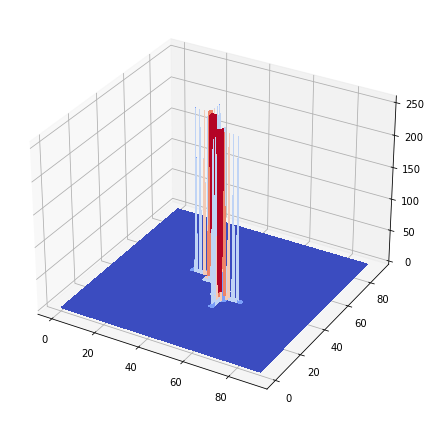

In [6]:
threshold = 100
ft_sampled_s45 = fft2(sampled_s45)
shift_ft_sampled_s45 = fftshift(ft_sampled_s45)
tr_shift_ft_sampled_s45 = thresholdImage(shift_ft_sampled_s45, threshold)
surf(tr_shift_ft_sampled_s45)

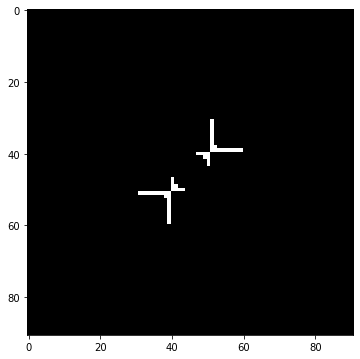

In [7]:
imshow(tr_shift_ft_sampled_s45)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

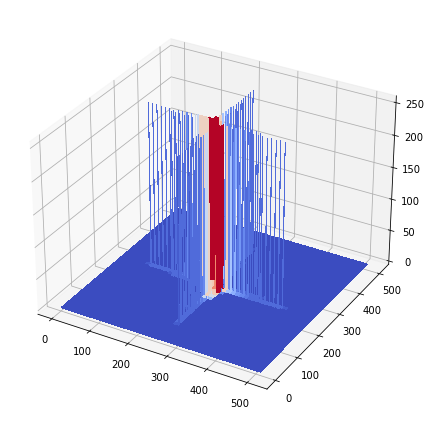

In [8]:
threshold = 100

ft_s45 = fft2(s45)
shift_ft_s45 = fftshift(ft_s45)
tr_shift_ft_s45 = thresholdImage(shift_ft_s45, threshold)
surf(tr_shift_ft_s45)

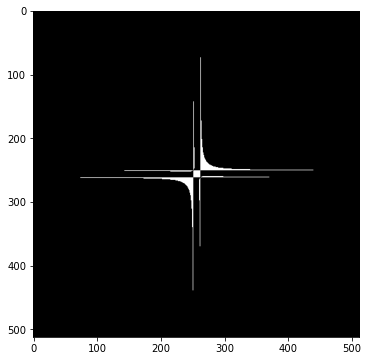

In [9]:
imshow(tr_shift_ft_s45)

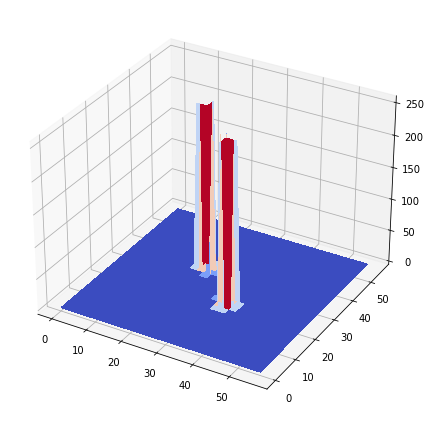

In [10]:
threshold = 100
s45bis=sinusoid2d(1,45,512,64,9)
ft_s45bis = fft2(s45bis)
shift_ft_s45bis = fftshift(ft_s45bis)
tr_shift_ft_s45bis = thresholdImage(shift_ft_s45bis , threshold)
surf(tr_shift_ft_s45bis)

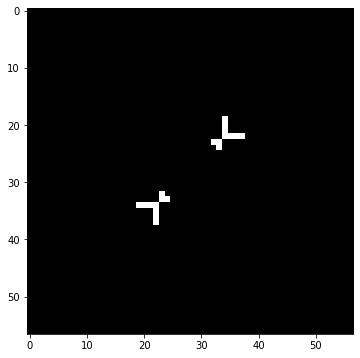

In [11]:
imshow(tr_shift_ft_s45bis)

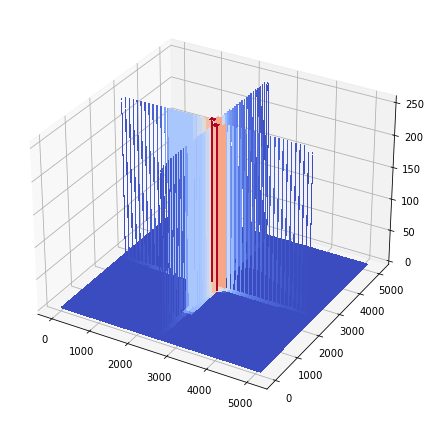

In [12]:
threshold = 100
s45bis=sinusoid2d(1,45,512,64,0.1)
ft_s45bis = fft2(s45bis)
shift_ft_s45bis = fftshift(ft_s45bis)
tr_shift_ft_s45bis = thresholdImage(shift_ft_s45bis , threshold)
surf(tr_shift_ft_s45bis)

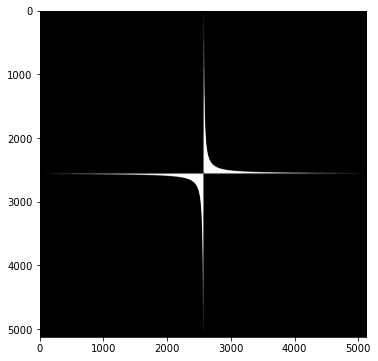

In [13]:
imshow(tr_shift_ft_s45bis)

In [14]:
# Il y a bien 2 dirac.

# Changement de position en fonction de te ( eloignement croissant en fonction de te)

# Appartitiond'une forme qui lorsque te devient grand pars aved le dirac ( j'en ai aucune idee c'est ce que j'observe)
# 

3. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

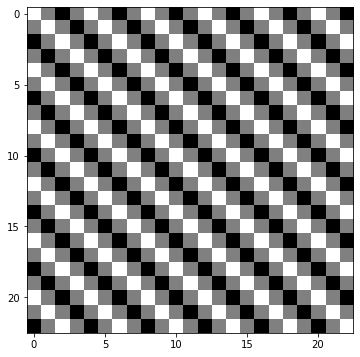

In [15]:
sampled_s45 = sinusoid2d(1,45,512,64,1/(4*f_m))
imshow(sampled_s45)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [16]:
A = 1
L = 512 

def error(s1, s2):
    return 1/(2*A*L**2) * np.sum(np.abs(s1-s2))

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

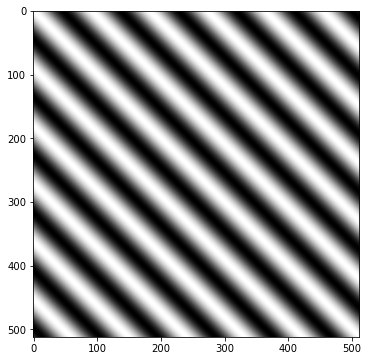

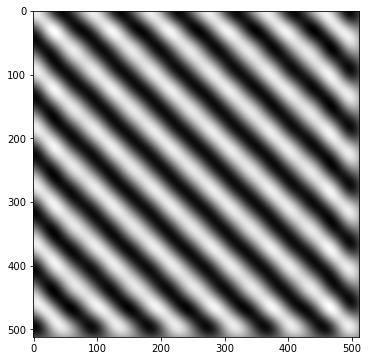

0.022936924363103007


In [17]:
sampled_s45 = sinusoid2d(1,45,512,64,1/(4*f_m))
s45_rec = shannonInterpolation(sampled_s45, 1/(4*f_m), 512)
s45 = sinusoid2d(1,45,512,64,1)
imshow(s45)
imshow(s45_rec)
print(error(s45, s45_rec))

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

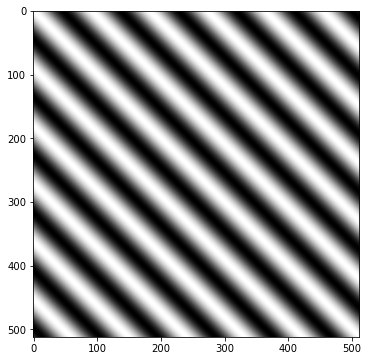

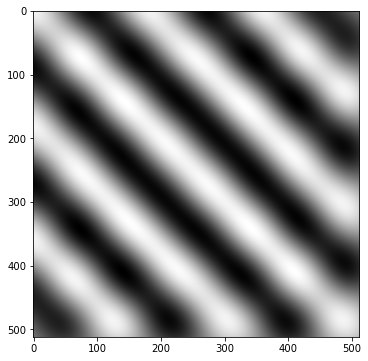

0.4068626475014588


In [18]:
sampled_s45 = sinusoid2d(1,45,512,64,1/(1.5*f_m))
s45_rec = shannonInterpolation(sampled_s45, 1/(1.5*f_m), 512)
s45 = sinusoid2d(1,45,512,64,1)
imshow(s45)
imshow(s45_rec)
print(error(s45, s45_rec))

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

In [19]:
newf=1/64*max(abs(np.cos(10)),abs(np.sin(10)))
print(newf)

0.01311049264181957


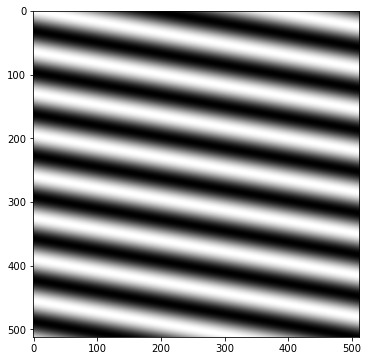

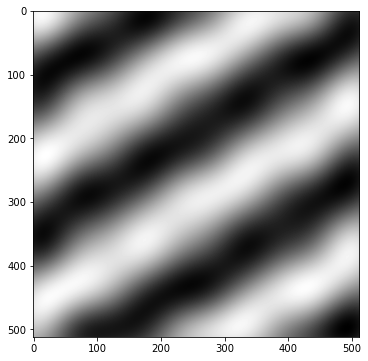

0.4070386795390057


In [20]:
s10 = sinusoid2d(1,10,512,64,1/(1.5*newf))
s10_rec = shannonInterpolation(s10, 1/(1.5*newf), 512)
s10 = sinusoid2d(1,10,512,64,1)

imshow(s10)
imshow(s10_rec)
print(error(s10, s10_rec))

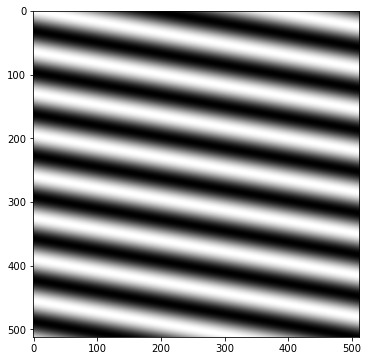

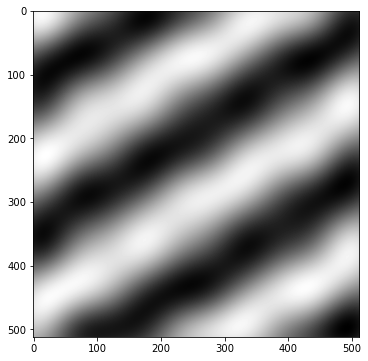

0.4070386795390057


In [21]:
sampled_s10 = sinusoid2d(1,10,512,64,1/(1.5*newf))
s10_rec = shannonInterpolation(sampled_s10, 1/(1.5*newf), 512)
s10 = sinusoid2d(1,10,512,64,1)
imshow(s10)
imshow(s10_rec)
print(error(s10, s10_rec))

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [22]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

def shannonInterpolationLoop():
    tic()
    print("ok")
    tac()

## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

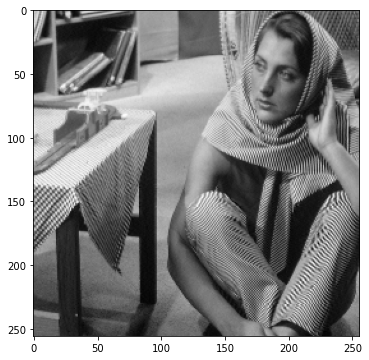

In [23]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

barbara2=subSample2(barbara)
imshow(barbara2)

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

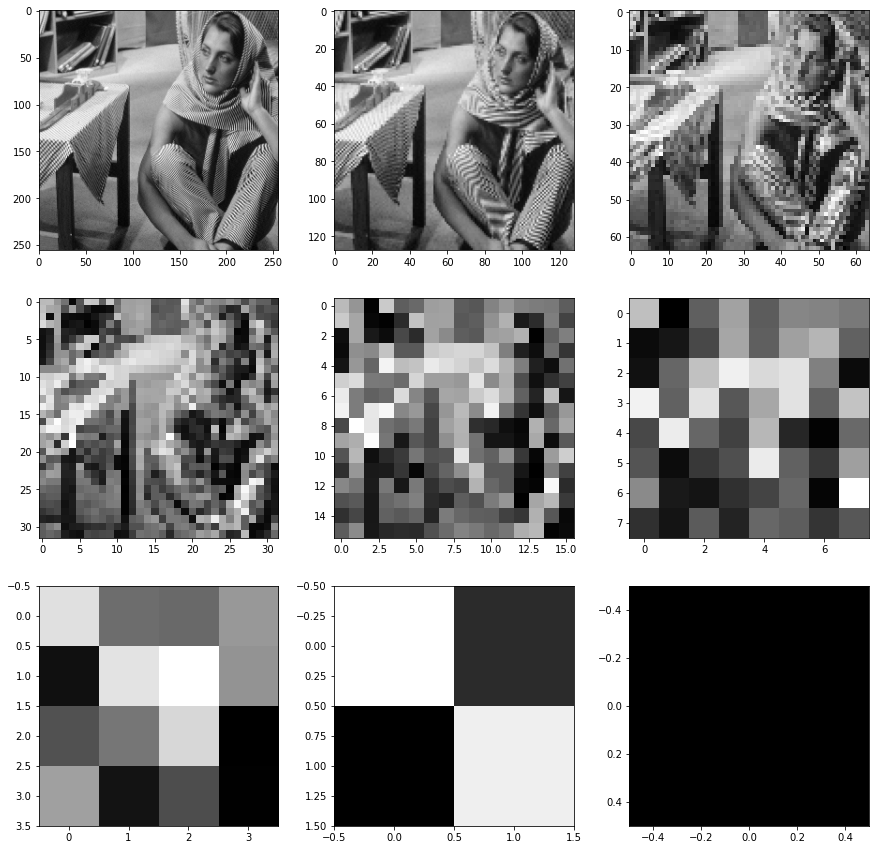

In [24]:
def thresholdImage(I,s):
    return np.where((I<s),0,255)
    """ Array*int -> Array """

n=9
threshold=1e5
barbara3=barbara
barbaralist=[]
fig=plt.figure(figsize=(15,15))

for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    barbara3=subSample2(barbara3)
    plt.imshow(barbara3)

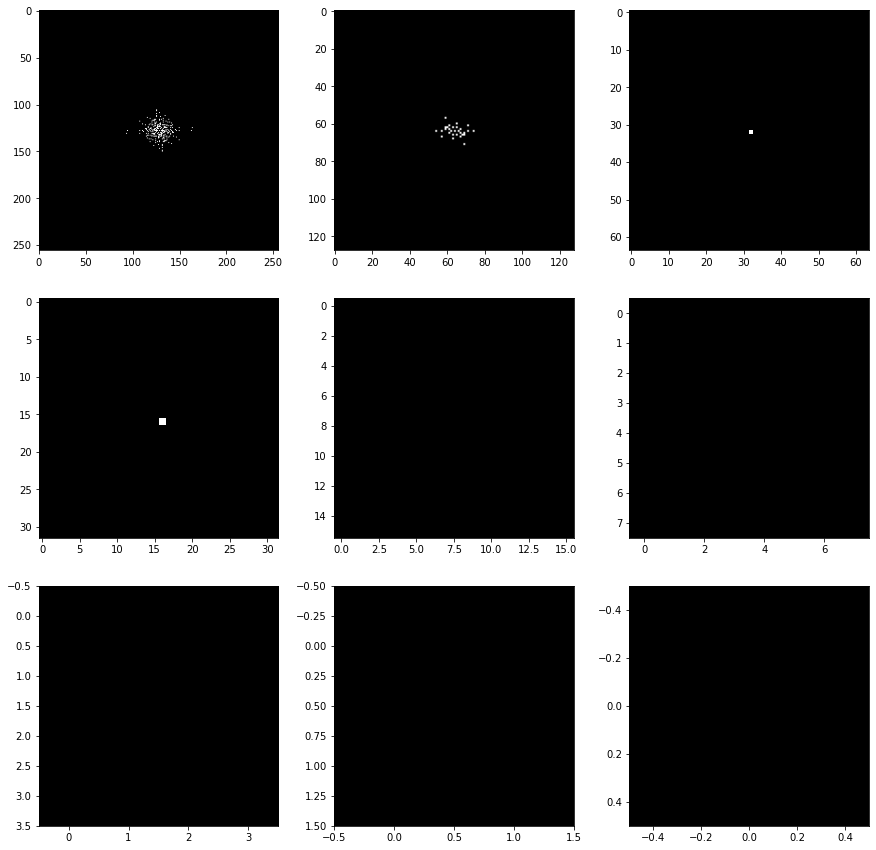

In [25]:
n=9
threshold=1e5
barbara3=barbara
barbaralist=[]
fig=plt.figure(figsize=(15,15))

for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    barbara3=subSample2(barbara3)
    ft_barbara3=fft2(barbara3)
    ft_barbara3=fftshift(ft_barbara3)
    ft_barbara3=3*ft_barbara3
    plt.imshow(thresholdImage(ft_barbara3, threshold))    

3. Bonus question: same question with the image `img/mandrill.png`.

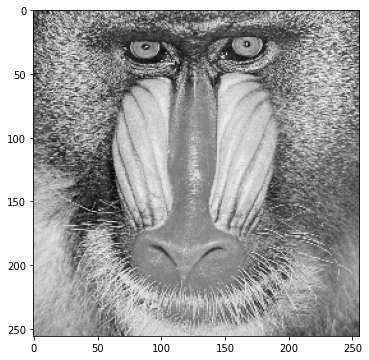

In [26]:
mandrill = np.array(Image.open('img/mandrill.png'))
mandrill2=subSample2(mandrill)
imshow(mandrill2)

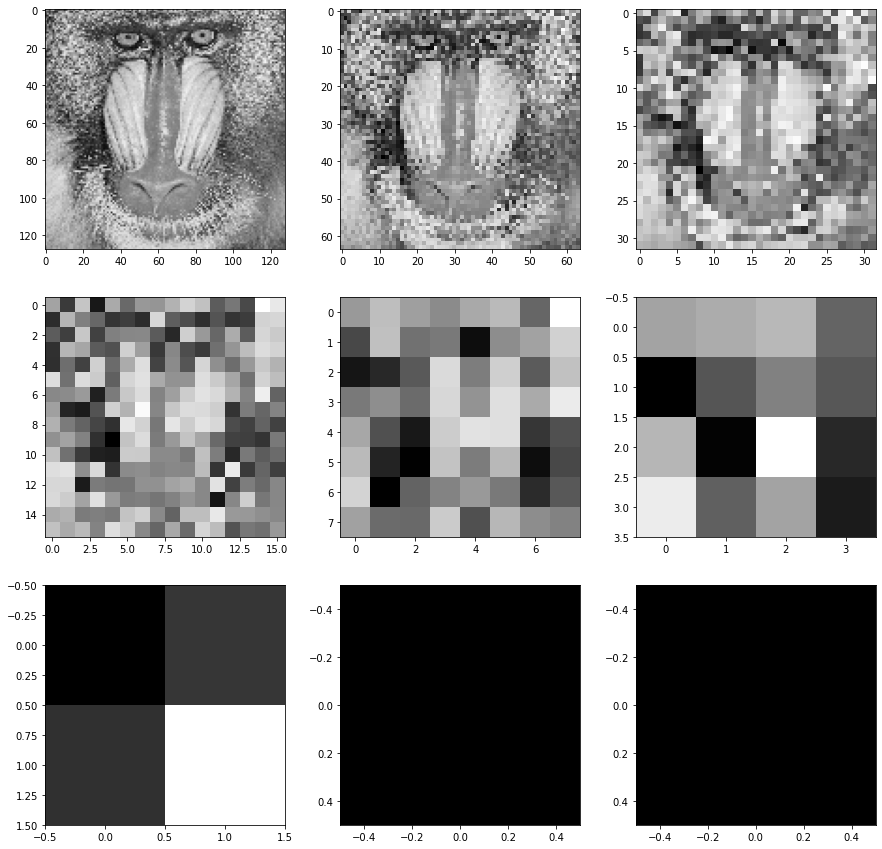

In [27]:
n=9

barbara3=barbara
barbaralist=[]
fig=plt.figure(figsize=(15,15))

for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    mandrill2=subSample2(mandrill2)
    plt.imshow(mandrill2)

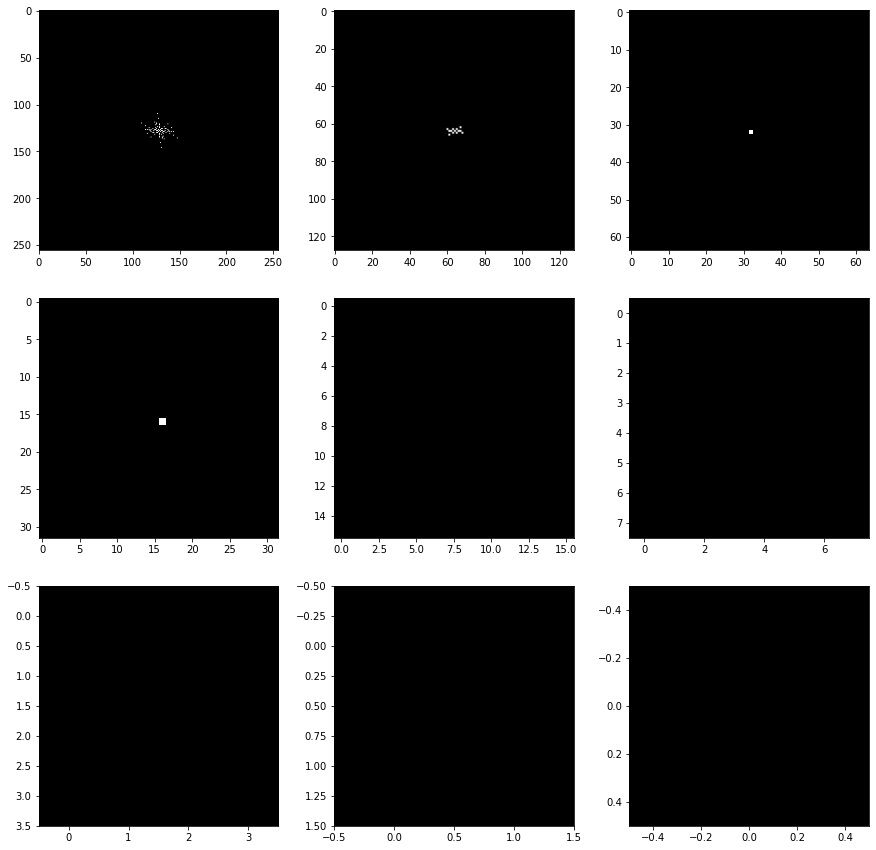

In [28]:
mandrill2=mandrill
mandrilllist=[]
fig=plt.figure(figsize=(15,15))

for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    mandrill2=subSample2(mandrill2)
    ft_mandrill2=fft2(mandrill2)
    ft_mandrill2=fftshift(ft_mandrill2)
    ft_mandrill2=3*ft_mandrill2
    plt.imshow(thresholdImage(ft_mandrill2, threshold)) 

## Exercice supplémentaires :